# Global Power Plant Database

#### Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [72]:
df_usa = pd.read_csv(r"C:\Users\HP\Downloads\database_USA.csv")
df_ind = pd.read_csv(r"C:\Users\HP\Downloads\database_IND.csv")
df_aus = pd.read_csv(r"C:\Users\HP\Downloads\database_AUS.csv")

**Joining all dataframe**

In [73]:
df = pd.concat([df_ind, df_aus,df_usa])
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.shape

(13298, 27)

In [75]:
## Droping duplicate value
df.drop_duplicates(inplace=True)
df.shape

(13298, 27)

In [76]:
## Removing white space from each columns
for i in df:
    df[i] = df[i].astype(str).str.strip()

In [77]:
## replacing Nan to np.nan
df.replace('nan', np.nan, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  object 
 5   latitude                  13220 non-null  object 
 6   longitude                 13220 non-null  object 
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  object 
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [79]:
df.nunique() ## checking number of unique values

country                         3
country_long                    3
name                        13266
gppd_idnr                   13298
capacity_mw                  2304
latitude                     3550
longitude                    5773
primary_fuel                   14
other_fuel1                    12
other_fuel2                    11
other_fuel3                     9
commissioning_year            123
owner                        5877
source                        206
url                           325
geolocation_source              5
wepp_id                         0
year_of_capacity_data           1
generation_gwh_2013          4896
generation_gwh_2014          5023
generation_gwh_2015          5199
generation_gwh_2016          5447
generation_gwh_2017          5667
generation_gwh_2018          5816
generation_gwh_2019          5621
generation_data_source          3
estimated_generation_gwh        0
dtype: int64

**Looking missing value more in percentage**

In [80]:
(df.isna().sum()/len(df) )*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.045120
latitude                      0.586554
longitude                     0.586554
primary_fuel                 15.069935
other_fuel1                  87.757558
other_fuel2                  97.969619
other_fuel3                  99.308167
commissioning_year           19.882689
owner                         4.459317
source                        0.000000
url                           0.000000
geolocation_source            0.172958
wepp_id                     100.000000
year_of_capacity_data         3.293728
generation_gwh_2013          46.082118
generation_gwh_2014          43.344864
generation_gwh_2015          39.893217
generation_gwh_2016          34.569108
generation_gwh_2017          30.124831
generation_gwh_2018          25.868552
generation_gwh_2019          26.470146
generation_data_source   

**Visualizing missing value**

<Axes: >

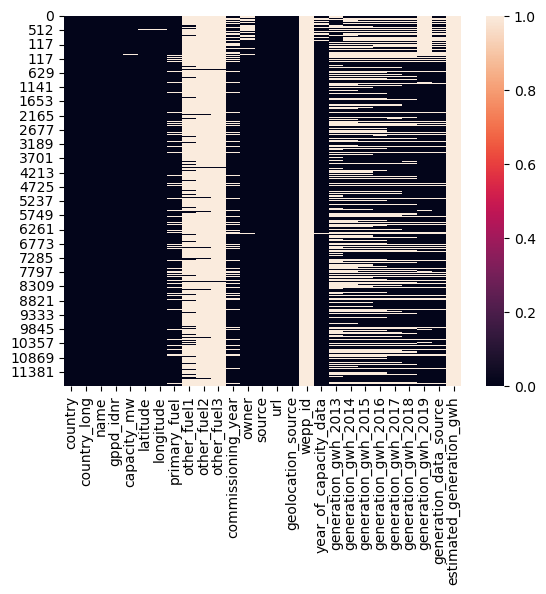

In [81]:
sns.heatmap(df.isna())

**Converting String to numeric**

In [82]:
##removing nois from column
df.drop(index=[302,20],inplace=True)
df['generation_gwh_2019']=df['generation_gwh_2019'].astype("float",)

In [83]:
col =['latitude','longitude','capacity_mw','generation_gwh_2013','generation_gwh_2014',"commissioning_year",'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
for i in col:
    df[i] = df[i].apply(pd.to_numeric)

In [84]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [85]:
## here country and country_loge are similar that's we can drop one of these column
df.drop("country",axis=1,inplace=True)

**Making copy of anther dataset to find missing value**

In [86]:
data = df.copy()
data.shape

(13292, 26)

In [87]:
data["na_generation_gwh_2013"] = data["generation_gwh_2013"].replace(np.nan,0)
data["na_generation_gwh_2014"] = data["generation_gwh_2014"].replace(np.nan,0)
data["na_generation_gwh_2015"] = data["generation_gwh_2015"].replace(np.nan,0)
data["na_generation_gwh_2016"] = data["generation_gwh_2016"].replace(np.nan,0)
data["na_generation_gwh_2017"] = data["generation_gwh_2017"].replace(np.nan,0)
data["na_generation_gwh_2018"] = data["generation_gwh_2018"].replace(np.nan,0)
data["na_generation_gwh_2019"] = data["generation_gwh_2019"].replace(np.nan,0)

In [88]:
data["na_generation_gwh_2013"]=np.where(data["na_generation_gwh_2013"]==0,0,1)
data["na_generation_gwh_2014"]=np.where(data["na_generation_gwh_2014"]==0,0,1)
data["na_generation_gwh_2015"]=np.where(data["na_generation_gwh_2015"]==0,0,1)
data["na_generation_gwh_2016"]=np.where(data["na_generation_gwh_2016"]==0,0,1)
data["na_generation_gwh_2017"]=np.where(data["na_generation_gwh_2017"]==0,0,1)
data["na_generation_gwh_2018"]=np.where(data["na_generation_gwh_2018"]==0,0,1)
data["na_generation_gwh_2019"]=np.where(data["na_generation_gwh_2019"]==0,0,1)

In [89]:
data["na_commissioning_year"] = data["commissioning_year"].replace(np.nan,0)
data["na_commissioning_year"]=np.where(data["na_commissioning_year"]==0,0,1)

In [90]:
data.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,generation_data_source,estimated_generation_gwh,na_generation_gwh_2013,na_generation_gwh_2014,na_generation_gwh_2015,na_generation_gwh_2016,na_generation_gwh_2017,na_generation_gwh_2018,na_generation_gwh_2019,na_commissioning_year
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,1
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,...,Central Electricity Authority,NaN,1,1,1,1,1,1,0,1
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,...,Central Electricity Authority,NaN,0,1,1,1,1,1,0,1


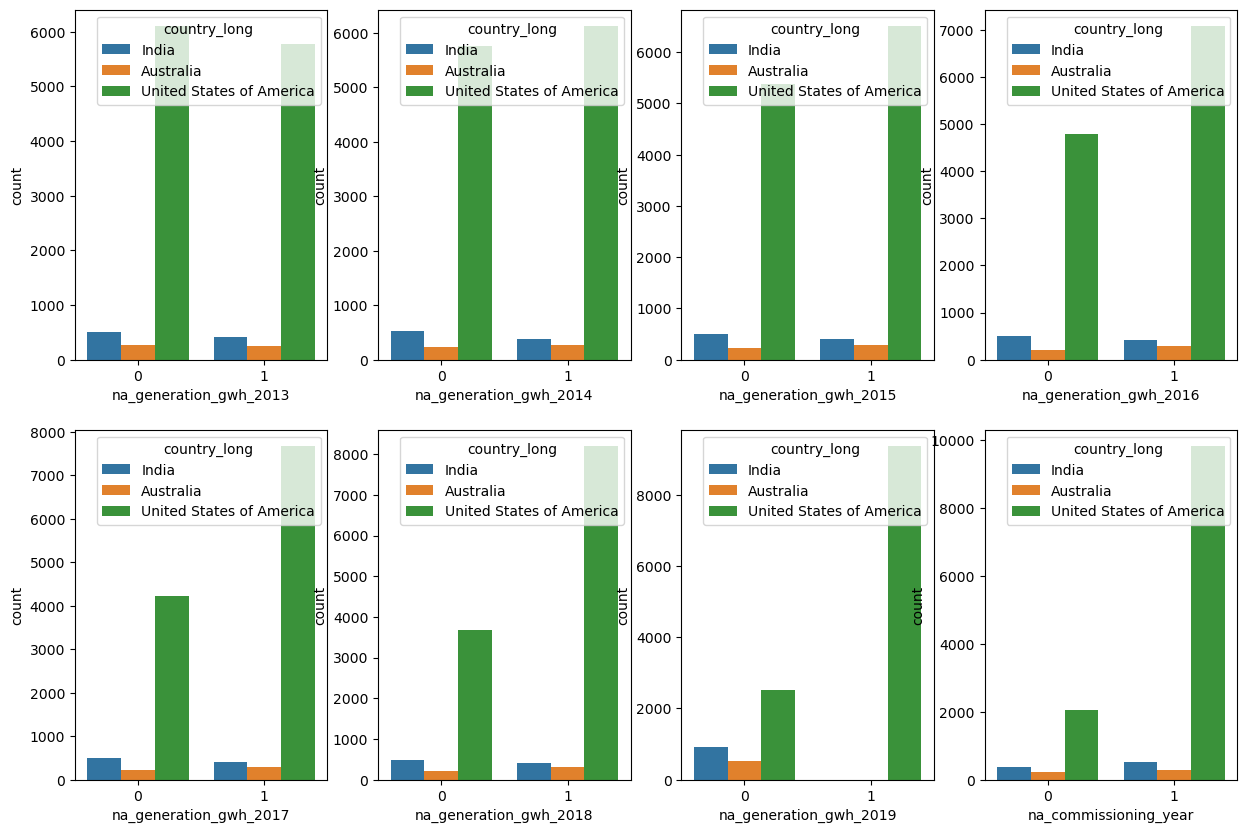

In [91]:
list1=["na_generation_gwh_2013","na_generation_gwh_2014","na_generation_gwh_2015","na_generation_gwh_2016","na_generation_gwh_2017","na_generation_gwh_2018","na_generation_gwh_2019","na_commissioning_year"]
num = 1
plt.figure(figsize=(15,10))
for i in list1:
    if num<=8:
        ax=plt.subplot(2,4,num)
        sns.countplot(data=data,x=data[i],hue='country_long')
        num+=1
plt.show()

* Here USA has more missing value in than india and australia . in generation_data_source we have only three unique values for each country 

In [92]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority',
       'Australia Clean Energy Regulator',
       'U.S. Energy Information Administration'], dtype=object)

In [93]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About',
       'Australian Renewable Energy Mapping Infrastructure',
       'U.S. Energy Information Administration'], dtype=object)

In [94]:
data["country_long"].unique()

array(['India', 'Australia', 'United States of America'], dtype=object)

In [95]:
data["na_geolocation_source"] = data['geolocation_source'].replace(np.nan,0)
data["na_geolocation_source"]=np.where(data["na_geolocation_source"]==0,0,1)

<Axes: xlabel='geolocation_source', ylabel='count'>

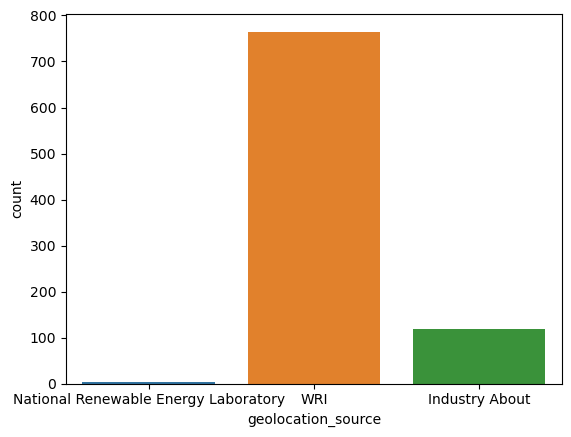

In [96]:
sns.countplot(data=df_ind,x=df_ind['geolocation_source'])

**Here geolocation_source column has only five unique value. In from above usa and aus has only one value and india has 3 value
by this we fill na**

In [97]:
df_ind['generation_data_source'].fillna('Central Electricity Authority', inplace=True)
df_aus['generation_data_source'].fillna('Australia Clean Energy Regulator', inplace=True)
df_usa['generation_data_source'].fillna('U.S. Energy Information Administration', inplace=True)

In [98]:
df_ind['geolocation_source'].fillna('WRI', inplace=True) ## most frequant value 
df_aus['geolocation_source'].fillna('Australian Renewable Energy Mapping Infrastructure', inplace=True)
df_usa['geolocation_source'].fillna('U.S. Energy Information Administration', inplace=True)

In [99]:
## making New dataframe agian
df = pd.concat([df_ind, df_aus,df_usa])

* **'estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2' and 'other_fuel1' columns have more than 
  80 % data null than we have to drop it**
* **'year_of_capacity_data' have only one unique value that's we have to drop it**
* **name is not use full to predict we have to drop it**

In [100]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1','gppd_idnr','year_of_capacity_data'],axis=1,inplace=True)
df.head(3)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority


from sklearn.impute import KNNImputer
imp = KNNImputer()


In [101]:
(df.isna().sum() / len(df) )*100

country                    0.000000
country_long               0.000000
name                       0.000000
capacity_mw                0.045120
latitude                   0.586554
longitude                  0.586554
primary_fuel              15.069935
commissioning_year        19.882689
owner                      4.459317
source                     0.000000
url                        0.000000
geolocation_source         0.000000
generation_gwh_2013       46.082118
generation_gwh_2014       43.344864
generation_gwh_2015       39.893217
generation_gwh_2016       34.569108
generation_gwh_2017       30.124831
generation_gwh_2018       25.868552
generation_gwh_2019       26.470146
generation_data_source     0.000000
dtype: float64

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df.drop(index=[302,20],inplace=True)
df['generation_gwh_2019']=df['generation_gwh_2019'].astype("float",)

In [104]:
ob_col = df.select_dtypes("O").columns.tolist()

In [105]:
## lebalized categorical value 
lb = LabelEncoder()
for i in ob_col:
    df[i]=lb.fit_transform(df[i])

In [106]:
## Removing white space from each columns
for i in df:
    df[i] = df[i].astype(str).str.strip()

**From above generation_gwh columns has no reationship with other columns thas why we use knn imputer and using 5 neighbors refrence for imputetion**

In [107]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df_new = imp.fit_transform(df)
df = pd.DataFrame(df_new,columns=df.columns)
df.head(3)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,1.0,1.0,75.0,2.5,28.1839,73.2407,10.0,2011.0,4768.0,115.0,135.0,2.0,7.308000,10.104000,14.320000,14.190,4.342,4.454,4.346,1.0
1,1.0,1.0,78.0,98.0,24.7663,74.6090,1.0,2003.8,5416.0,187.0,191.0,4.0,121.035056,80.824556,71.895111,68.510,70.012,61.672,88.344,1.0
2,1.0,1.0,96.0,39.2,21.9038,69.3732,13.0,2010.8,61.0,21.0,223.0,4.0,47.198000,5.618000,8.846000,8.002,5.062,9.130,24.204,1.0


### Exploratory data analysis

In [108]:
df.describe()

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
count,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000
mean,1.855176,1.855176,6628.742251,117.758086,35.015411,-73.440708,8.411902,1998.742131,3004.380229,167.623909,79.870599,2.928679,352.649858,397.333818,400.161431,392.029401,394.004225,397.613071,329.734730,1.855176
std,0.447887,0.447887,3828.430587,347.161671,15.426231,63.128490,4.255336,22.392559,1764.572831,48.737813,52.527138,0.662096,1524.947201,1681.481416,1693.879760,1681.962924,1693.029583,1706.755803,1469.109073,0.447887
min,0.000000,0.000000,0.000000,0.000000,-42.888300,-171.710000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,-947.600000,-989.620000,-864.430000,-768.620000,-934.940000,-982.620000,-780.340000,0.000000
25%,2.000000,2.000000,3312.750000,1.500000,33.880000,-104.590000,5.000000,1989.000000,1579.000000,184.000000,68.000000,3.000000,4.921500,4.817500,4.398000,3.837500,3.461500,3.257000,3.600000,2.000000
50%,2.000000,2.000000,6627.500000,5.500000,38.370000,-87.201000,10.000000,2007.000000,2880.000000,184.000000,68.000000,3.000000,21.104000,20.520000,18.020000,15.960000,14.991389,14.317000,14.704000,2.000000
75%,2.000000,2.000000,9943.250000,52.800000,42.170000,-75.387500,13.000000,2015.000000,4589.250000,184.000000,68.000000,3.000000,104.710000,111.300000,98.367199,94.468500,94.450000,96.862500,85.583500,2.000000
max,2.000000,2.000000,13259.000000,6809.000000,425.250000,153.434100,14.000000,2020.000000,5874.000000,204.000000,322.000000,4.000000,31431.080000,32320.920000,32525.600000,32377.480000,35116.000000,35136.000000,31920.370000,2.000000


* from above dataset have hude diffrencebetween Q3 and max value that's why dataset have outliers
* In capacity_mw have min value as 0 sounds like somthing wrong 
* generation_gwhs column min value is in negetive it is look like a mistake

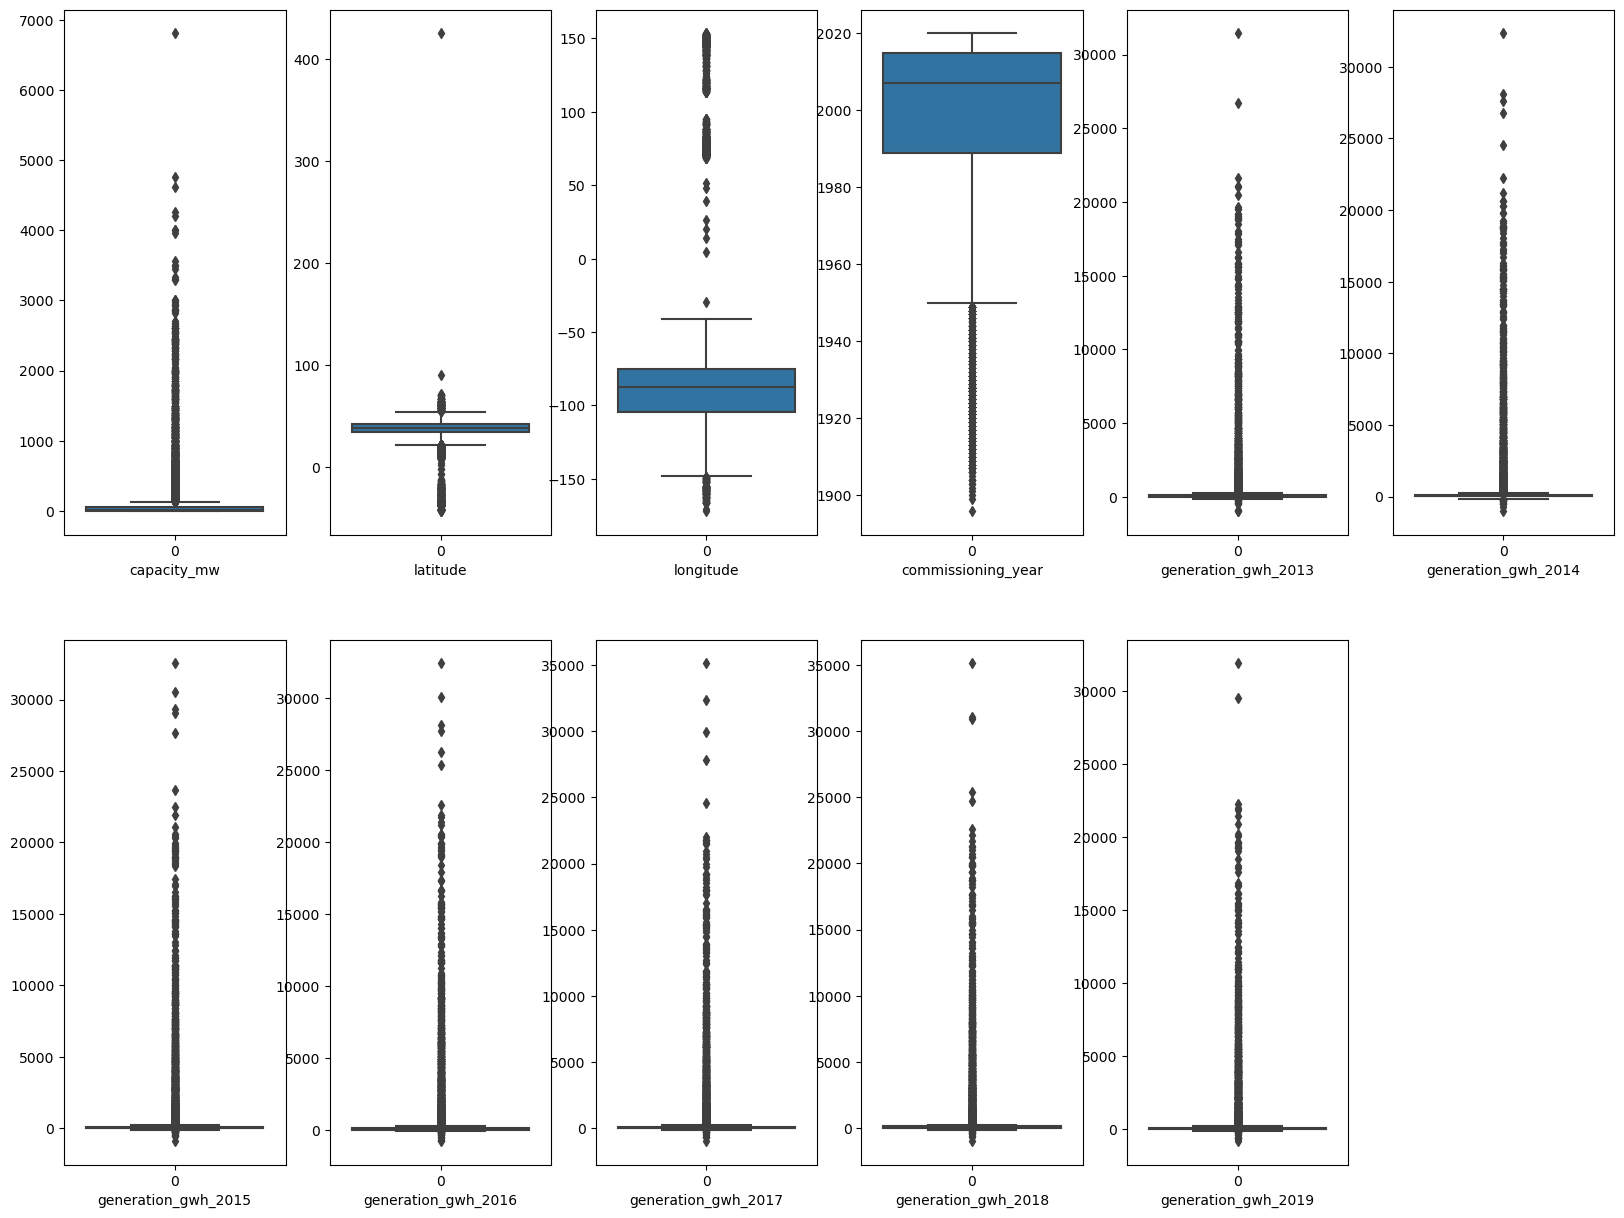

In [109]:
## tracking outliers from graph

plt.figure(figsize=(20,15))
num = 1
for i in df.drop(ob_col,axis=1):
    if num <=12:
        ax = plt.subplot(2,6,num)
        sns.boxplot(df[i])
        plt.xlabel(i)
        num +=1
plt.show()

* **Removing Outliers**

In [110]:
from scipy.stats import zscore

In [111]:
z = np.abs(zscore(df))
z.head()

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,1.909428,1.909428,1.711926,0.332014,0.442867,2.323625,0.373216,0.547429,0.999497,1.079775,1.049581,1.402688,0.226470,0.230300,0.227794,0.224650,0.230165,0.230363,0.221495,1.909428
1,1.909428,1.909428,1.711142,0.056915,0.664420,2.345300,1.741856,0.225881,1.366739,0.397573,2.115736,1.618136,0.151890,0.188239,0.193803,0.192354,0.191376,0.196838,0.164317,1.909428
2,1.909428,1.909428,1.706440,0.226295,0.849988,2.262359,1.078239,0.538497,1.668104,3.008535,2.724968,1.618136,0.200311,0.232968,0.231026,0.228330,0.229740,0.227623,0.207978,1.909428
3,1.909428,1.909428,1.704351,0.049667,0.722447,2.610661,1.271840,0.234813,1.626302,2.967498,0.378306,1.618136,0.229679,0.131113,0.261885,0.293701,0.159348,0.133959,0.156224,1.909428
4,1.909428,1.909428,1.703306,4.845884,0.846325,2.468864,1.741856,0.726066,1.626302,2.967498,0.378306,1.618136,0.113871,1.569042,3.256675,3.478787,2.948421,4.032004,0.197130,1.909428


In [112]:
np.where(z>3)

(array([    2,     4,     4, ..., 13259, 13259, 13261], dtype=int64),
 array([ 9,  3, 14, ...,  3, 18,  7], dtype=int64))

In [113]:
print(z.iloc[2,9],z.iloc[4,3])

3.008535199349098 4.845884025711761


In [114]:
df = df[(z<3).all(axis=1)]
df.shape

(11745, 20)

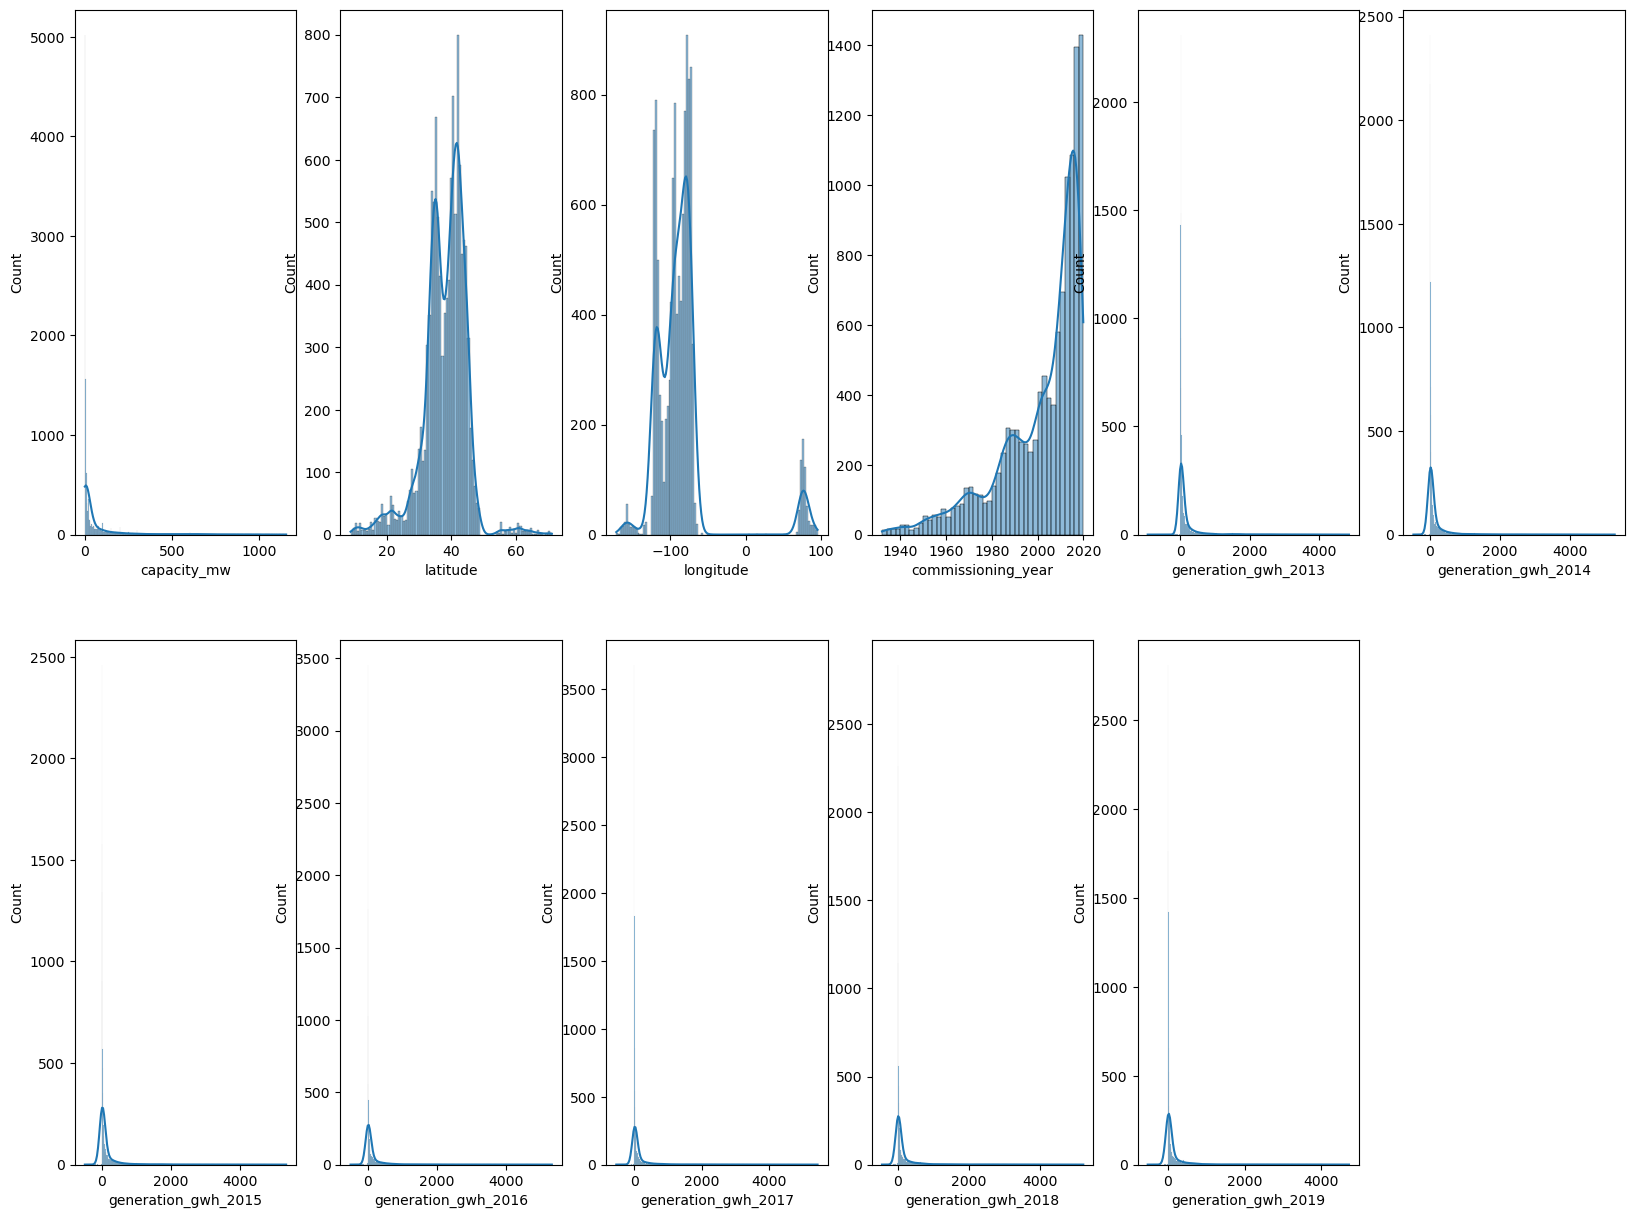

In [115]:
##Visiualizing  skweness from graph

plt.figure(figsize=(20,15))
num = 1
for i in df.drop(ob_col,axis=1):
    if num <=12:
        ax = plt.subplot(2,6,num)
        sns.histplot(df[i],kde=True)
        plt.xlabel(i)
        num +=1
plt.show()

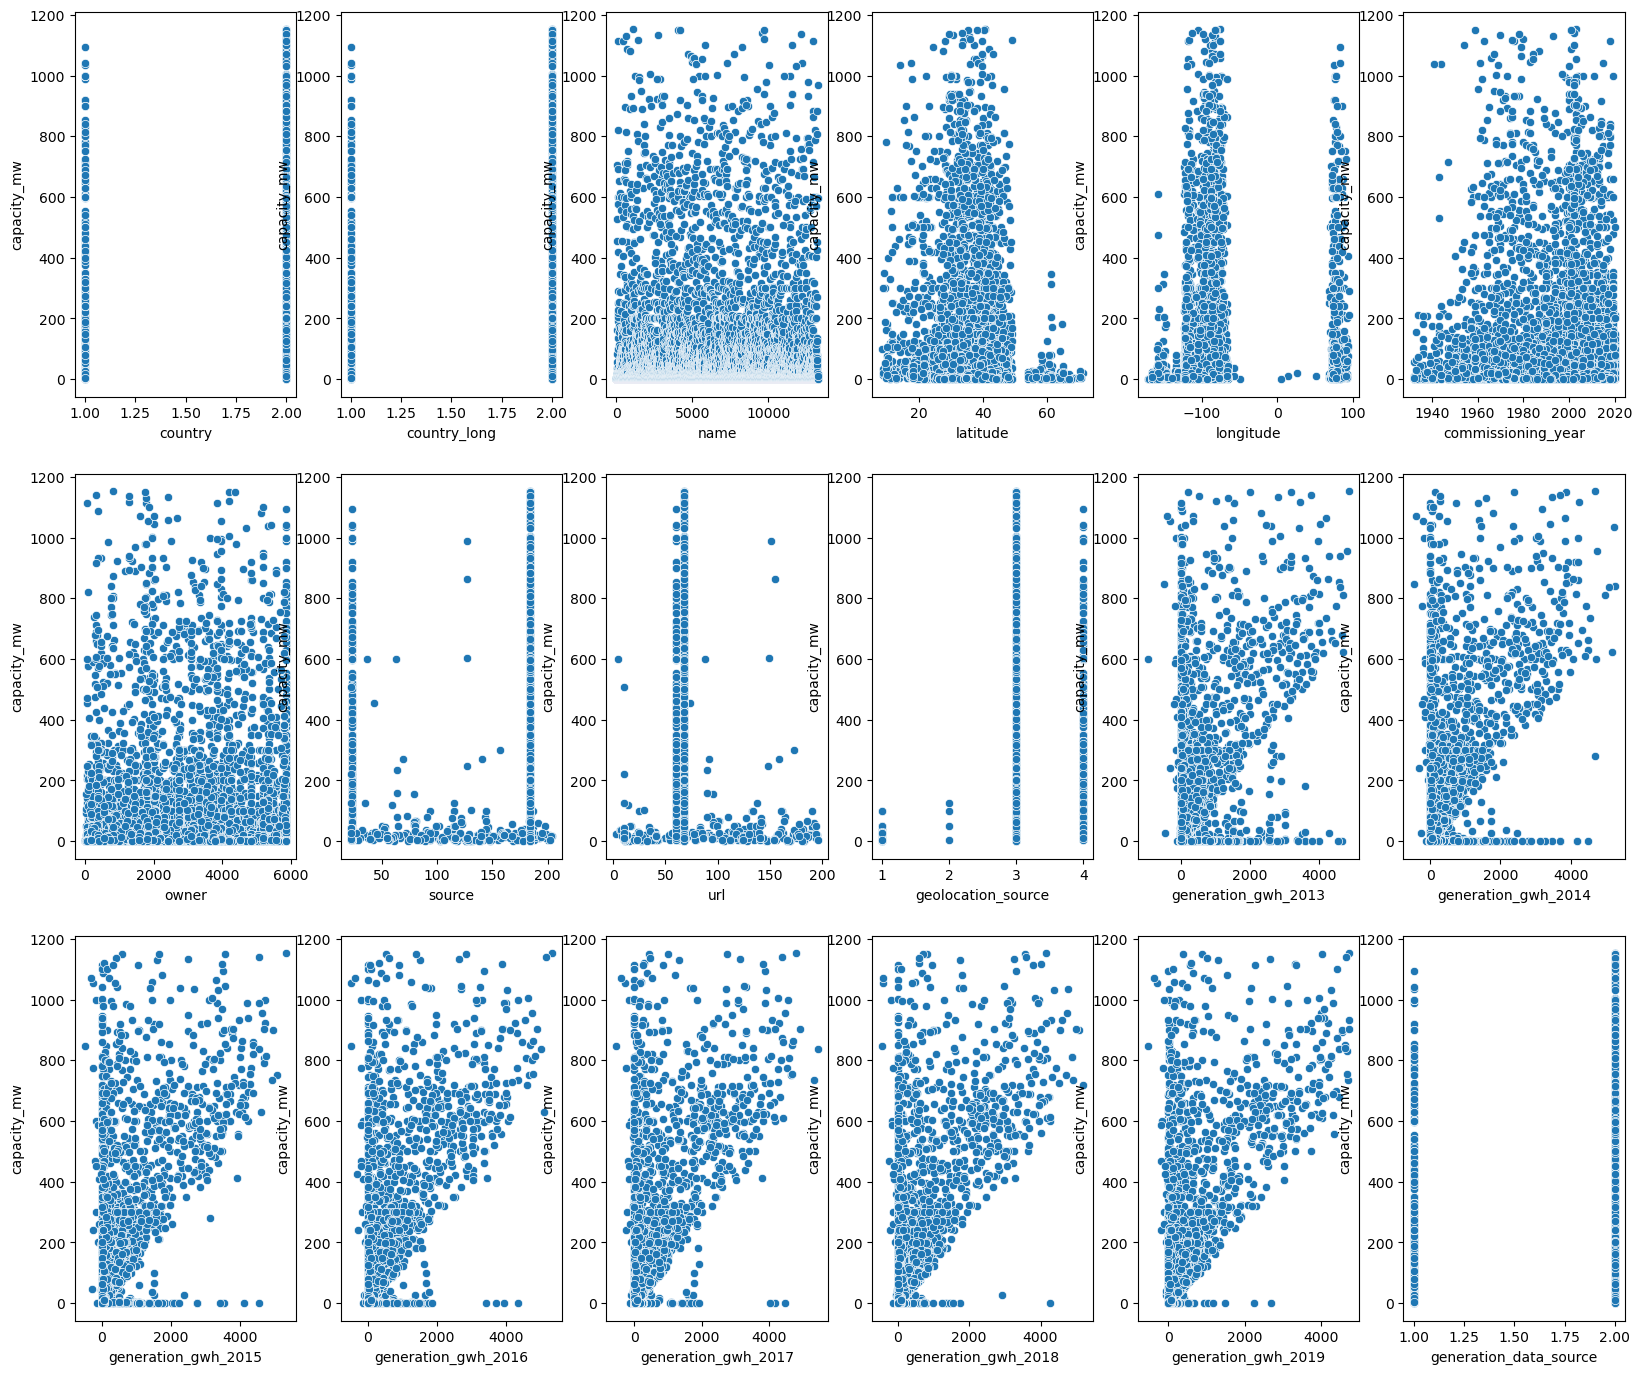

In [116]:
## scatterplot Plot to check correlation
plt.figure(figsize=(20,17))
num = 1
for i in df.drop(["capacity_mw","primary_fuel"],axis=1):
    if num <=18:
        ax = plt.subplot(3,6,num)
        sns.scatterplot(x=df[i],y=df["capacity_mw"])
        plt.xlabel(i)
        num +=1
plt.show()

<Axes: >

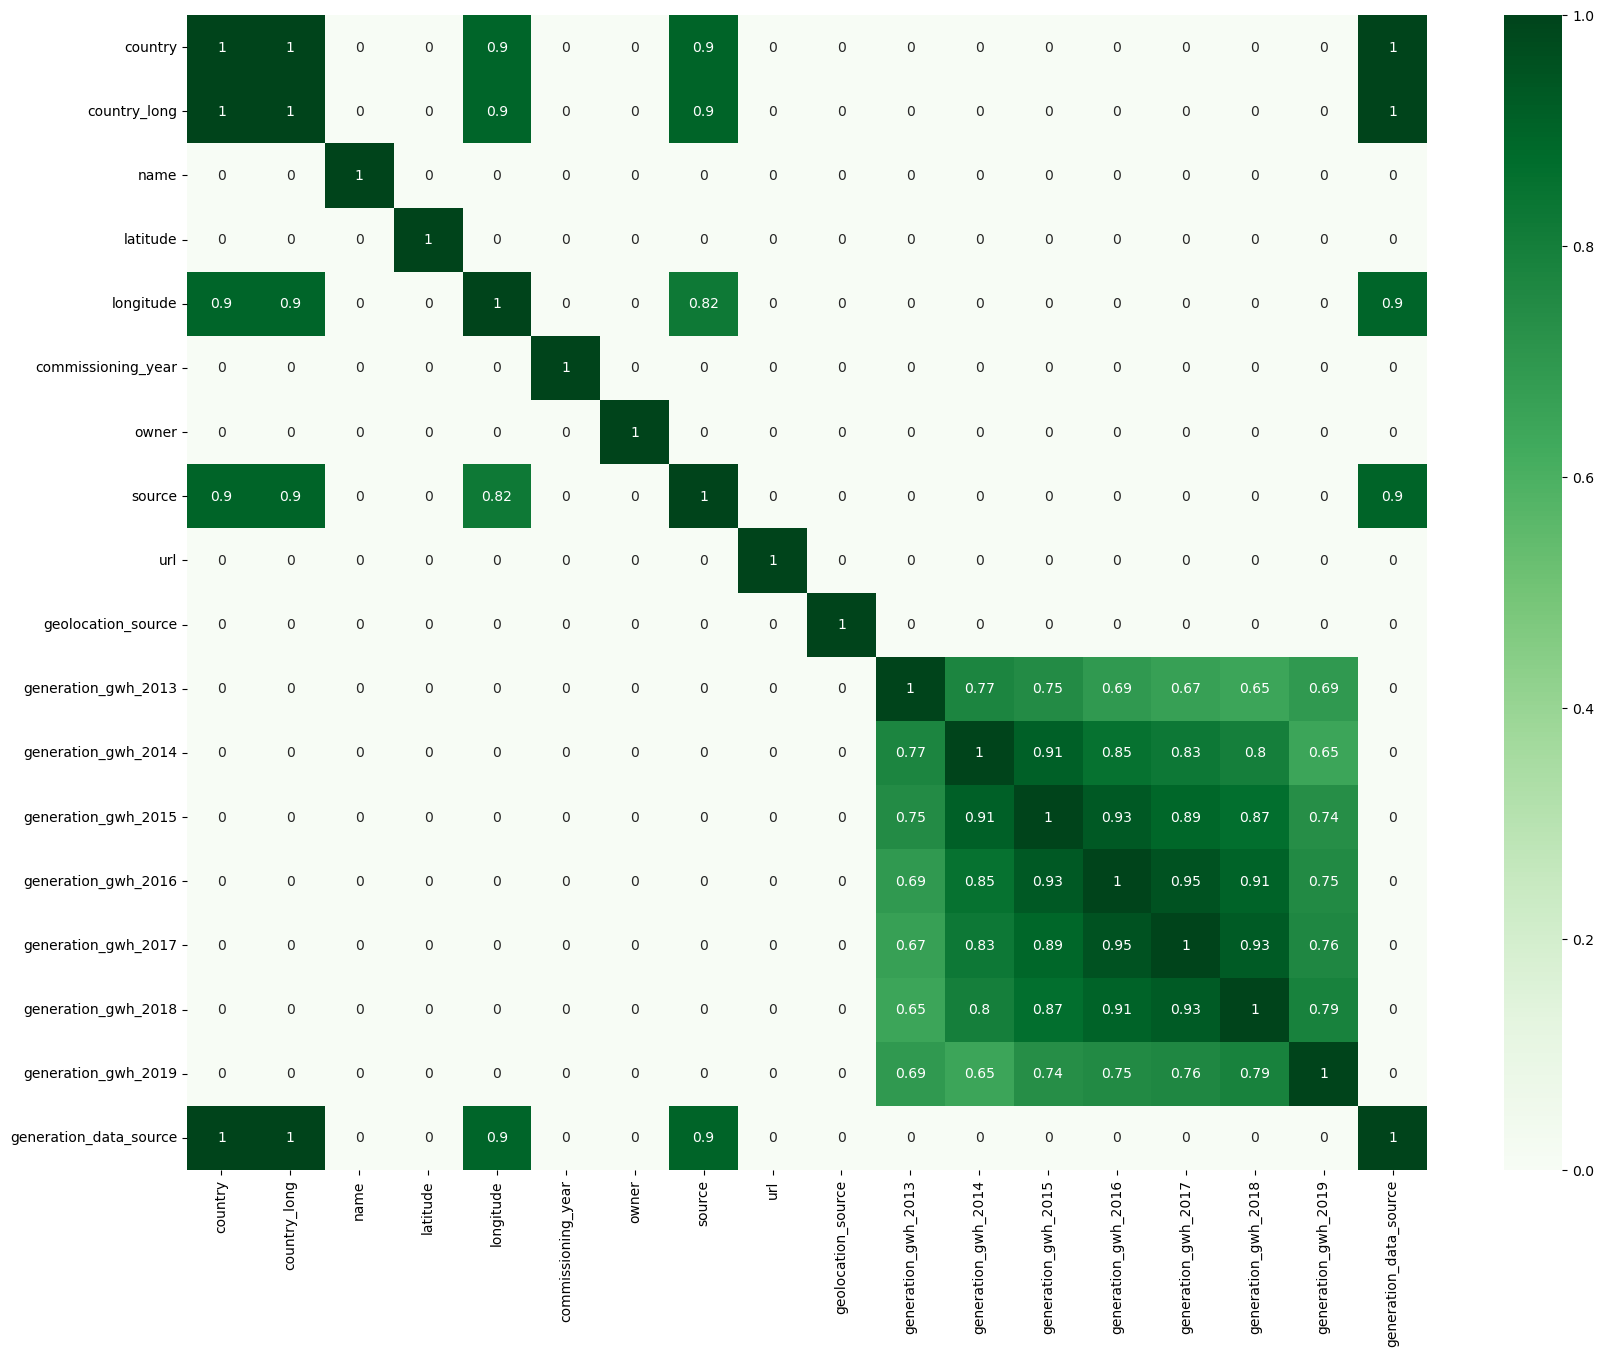

In [117]:
df_corr =np.abs(df.drop(["capacity_mw","primary_fuel"],axis=1).corr())
corr = (df_corr>.60) * df_corr 
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="Greens")

* "generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","generation_gwh_2019" has strong positive correletion to each other
* country long and country has high correletion because it is similar column we have to drop one column
* generation_data_source and source has strog positive correletion also source has strong(+) correletion with country long and country and longitude and source


In [118]:
## name column has more than 13000 unique value and it is not use full to predict 
df.drop(["country_long","name"],axis=1,inplace=True)

In [119]:
x = df.drop(["capacity_mw","primary_fuel"],axis=1)
x.head(3)

,country,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,1.0,28.1839,73.2407,2011.0,4768.0,115.0,135.0,2.0,7.308000,10.104000,14.320000,14.190000,4.3420,4.454000,4.346,1.0
1,1.0,24.7663,74.6090,2003.8,5416.0,187.0,191.0,4.0,121.035056,80.824556,71.895111,68.510000,70.0120,61.672000,88.344,1.0
3,1.0,23.8712,91.3602,2004.0,5874.0,23.0,60.0,4.0,2.414610,617.789264,843.747000,886.004428,663.7745,626.239128,100.234,1.0


In [120]:
y= df.loc[:,'capacity_mw']
y.head(3)

0      2.5
1     98.0
3    135.0
Name: capacity_mw, dtype: float64

#### Feature selection
* Using variance inflation factor

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif["ver"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

* removing high vif because it is affect our model perfomance

In [122]:
vif(x)

,ver,VIF
0,country,inf
1,latitude,47.439870
2,longitude,26.251124
3,commissioning_year,653.869998
4,owner,4.279378
5,source,339.783461
6,url,73.986515
7,geolocation_source,195.711112
8,generation_gwh_2013,3.483587
9,generation_gwh_2014,8.253582


In [123]:
x.drop(["commissioning_year","generation_data_source"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,country,656.225589
1,latitude,47.054769
2,longitude,19.752038
3,owner,4.221892
4,source,337.613115
5,url,57.231890
6,geolocation_source,141.819527
7,generation_gwh_2013,3.483265
8,generation_gwh_2014,8.253413
9,generation_gwh_2015,14.404007


In [124]:
x.drop(['generation_gwh_2016','generation_gwh_2017',"generation_gwh_2015" ,'source'],axis=1,inplace=True)
vif(x)

,ver,VIF
0,country,218.034018
1,latitude,46.863464
2,longitude,19.408370
3,owner,4.210976
4,url,40.452272
5,geolocation_source,83.629465
6,generation_gwh_2013,3.464415
7,generation_gwh_2014,4.791842
8,generation_gwh_2018,5.179014
9,generation_gwh_2019,3.882853


### feature selection

In [125]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [126]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=42))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [127]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [128]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 10
feature selected: 10


In [129]:
selected_feat

Index(['country', 'latitude', 'longitude', 'owner', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

In [130]:
x = x[selected_feat]
x.head()

,country,latitude,longitude,owner,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2018,generation_gwh_2019
0,1.0,28.1839,73.2407,4768.0,135.0,2.0,7.308000,10.104000,4.454000,4.346
1,1.0,24.7663,74.6090,5416.0,191.0,4.0,121.035056,80.824556,61.672000,88.344
3,1.0,23.8712,91.3602,5874.0,60.0,4.0,2.414610,617.789264,626.239128,100.234
5,1.0,23.7689,68.6447,5874.0,60.0,4.0,1.528000,1153.421000,976.655000,39.702
6,1.0,10.4547,77.0078,5874.0,60.0,4.0,5.036000,157.558250,48.327150,14.084


#### feature scaling

In [131]:
from sklearn.preprocessing import StandardScaler
smt = StandardScaler()

x_new = smt.fit_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)
x.head(3)

,country,latitude,longitude,owner,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2018,generation_gwh_2019
0,-4.225201,-1.429841,3.733297,1.018676,6.781928,-3.630058,-0.319277,-0.316222,-0.313966,-0.308544
1,-4.225201,-1.930325,3.765523,1.388042,12.483801,3.421717,-0.082753,-0.174616,-0.198864,-0.132400
2,-4.225201,-2.061407,4.160036,1.649107,-0.854509,3.421717,-0.329454,0.900566,0.936844,-0.107467


**spliting data into train and test**

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
print('x_train:',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train: (9396, 10)
x_test (2349, 10)
y_train (9396,)
y_test (2349,)


# Model Bulding

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### LinearRegression

In [135]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[ -5.98219821  -3.11094017   4.50241132   3.63004272  -3.571145
   8.74938061 -17.76695619  37.1403308   32.57532051  73.02487428]
65.23975307785604


In [136]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [137]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.6060037511657927
mean_absolute_error: 45.637370473520676
mean_squared_error: 9866.556935993742
<-----------------test data----------------->
r2_score: 0.5601749458346214
mean_absolute_error: 43.78190440715025
mean_squared_error: 10434.64095216403


### RandomForestRegressor

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [140]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [141]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9594843492037852
mean_absolute_error: 12.911678639846746
mean_squared_error: 1014.6035059026835
<-----------------test data----------------->
r2_score: 0.7078157398105285
mean_absolute_error: 32.91492128565347
mean_squared_error: 6931.933090388289


### GradientBoostingRegressor

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [144]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [145]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.7630598288818712
mean_absolute_error: 33.16489310114417
mean_squared_error: 5933.5176303794
<-----------------test data----------------->
r2_score: 0.6905708665423809
mean_absolute_error: 34.27626811619559
mean_squared_error: 7341.059535356636


### knn

In [146]:
from sklearn.neighbors import KNeighborsRegressor

In [147]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [148]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [149]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.7754364780588362
mean_absolute_error: 29.08070561941251
mean_squared_error: 5623.578350138356
<-----------------test data----------------->
r2_score: 0.634302410031658
mean_absolute_error: 34.296545764154956
mean_squared_error: 8676.001997277139


#### XGBOOST

In [150]:
from xgboost import XGBRegressor

In [151]:
xgr = XGBRegressor()
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
y_train_pred = xgr.predict(x_train)
y_test_pred = xgr.predict(x_test)

In [153]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9730773755715784
mean_absolute_error: 13.538563206380264
mean_squared_error: 674.2033904520131
<-----------------test data----------------->
r2_score: 0.6747136380836046
mean_absolute_error: 34.898012538184354
mean_squared_error: 7717.264764905816


### Final model

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
param = {
    "n_estimators" : [50,100,200],
    "max_depth" : [8,10,12,14],
    "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"]
}

In [206]:
rf_cv = GridSearchCV(estimator=rf,param_grid=param,scoring="neg_mean_squared_error",cv=7,verbose=1)
rf_cv.fit(x_train,y_train)

Fitting 7 folds for each of 48 candidates, totalling 336 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [8, 10, 12, 14],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [207]:
rf_cv.best_params_

{'criterion': 'poisson', 'max_depth': 14, 'n_estimators': 200}

In [209]:
y_train_pred = rf_cv.predict(x_train)
y_test_pred = rf_cv.predict(x_test)

In [210]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9505915480683472
mean_absolute_error: 15.399475927927305
mean_squared_error: 1237.2993538527235
<-----------------test data----------------->
r2_score: 0.7316864606901763
mean_absolute_error: 29.75285408564214
mean_squared_error: 6365.611551200135


### saving model

In [211]:
import joblib

In [212]:
joblib.dump(rf_cv,"power_plant_regressor.obj")

['power_plant_regressor.obj']

In [213]:
power_plant_regressor = joblib.load("power_plant_regressor.obj") # load model

In [221]:
val = df.loc[:,x.columns]
input_val=val.sample(2)

In [222]:
power_plant_regressor.predict(input_val)

array([889.9255    , 867.27605556])

## Classification

In [193]:
y= df.loc[:,'primary_fuel']
y.head(3)

0    10.0
1     1.0
3     3.0
Name: primary_fuel, dtype: float64

**spliting data into train and test**

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [195]:
print('x_train:',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train: (8221, 10)
x_test (3524, 10)
y_train (8221,)
y_test (3524,)


In [196]:
y_train.value_counts()

10.0    2372
14.0    1376
3.0     1238
5.0      907
13.0     805
7.0      616
12.0     382
1.0      217
0.0      145
11.0      75
4.0       41
2.0       25
9.0        8
8.0        7
6.0        7
Name: primary_fuel, dtype: int64

In [197]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train=smt.fit_resample(x_train,y_train)
print('x_train:',x_train.shape)
print('y_train',y_train.shape)

x_train: (35580, 10)
y_train (35580,)


In [198]:
y_train.value_counts()

3.0     2372
7.0     2372
5.0     2372
14.0    2372
1.0     2372
13.0    2372
10.0    2372
12.0    2372
8.0     2372
0.0     2372
4.0     2372
11.0    2372
2.0     2372
9.0     2372
6.0     2372
Name: primary_fuel, dtype: int64

# Model Bulding

### LogisticRegression

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [200]:
lg =LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [201]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [202]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.3331084879145587

classification_report:
               precision    recall  f1-score   support

         0.0       0.40      0.20      0.27      2372
         1.0       0.64      0.58      0.61      2372
         2.0       0.23      0.11      0.15      2372
         3.0       0.25      0.14      0.18      2372
         4.0       0.50      0.87      0.63      2372
         5.0       0.07      0.03      0.05      2372
         6.0       0.69      0.51      0.59      2372
         7.0       0.21      0.46      0.29      2372
         8.0       0.33      0.43      0.37      2372
         9.0       0.24      0.36      0.29      2372
        10.0       0.22      0.27      0.24      2372
        11.0       0.28      0.51      0.36      2372
        12.0       0.24      0.17      0.20      2372
        13.0       0.47      0.27      0.34      2372
        14.0       0.35      0.08      0.12      2372

    accuracy                           0.33     35580
   macro avg       0

In [203]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.20232690124858116

classification_report:
               precision    recall  f1-score   support

         0.0       0.11      0.14      0.12        56
         1.0       0.34      0.52      0.41        96
         2.0       0.03      0.11      0.05         9
         3.0       0.39      0.12      0.18       508
         4.0       0.08      0.74      0.14        23
         5.0       0.18      0.02      0.04       376
         6.0       0.02      0.50      0.04         2
         7.0       0.15      0.44      0.22       278
         8.0       0.00      0.11      0.01         9
         9.0       0.00      0.00      0.00         2
        10.0       0.60      0.28      0.38      1025
        11.0       0.03      0.62      0.06        29
        12.0       0.15      0.22      0.18       163
        13.0       0.51      0.20      0.29       336
        14.0       0.51      0.06      0.11       612

    accuracy                           0.20      3524
   macro avg       

### RandomForestClassifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
rfc =RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [207]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 1.0

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2372
         1.0       1.00      1.00      1.00      2372
         2.0       1.00      1.00      1.00      2372
         3.0       1.00      1.00      1.00      2372
         4.0       1.00      1.00      1.00      2372
         5.0       1.00      1.00      1.00      2372
         6.0       1.00      1.00      1.00      2372
         7.0       1.00      1.00      1.00      2372
         8.0       1.00      1.00      1.00      2372
         9.0       1.00      1.00      1.00      2372
        10.0       1.00      1.00      1.00      2372
        11.0       1.00      1.00      1.00      2372
        12.0       1.00      1.00      1.00      2372
        13.0       1.00      1.00      1.00      2372
        14.0       1.00      1.00      1.00      2372

    accuracy                           1.00     35580
   macro avg       1.00      1.00  

In [208]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.6625993189557321

classification_report:
               precision    recall  f1-score   support

         0.0       0.28      0.46      0.35        56
         1.0       0.54      0.64      0.58        96
         2.0       0.07      0.22      0.11         9
         3.0       0.61      0.50      0.55       508
         4.0       0.56      0.83      0.67        23
         5.0       0.68      0.60      0.64       376
         6.0       0.00      0.00      0.00         2
         7.0       0.72      0.82      0.77       278
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00         2
        10.0       0.81      0.83      0.82      1025
        11.0       0.44      0.76      0.56        29
        12.0       0.35      0.39      0.37       163
        13.0       0.67      0.72      0.69       336
        14.0       0.65      0.57      0.61       612

    accuracy                           0.66      3524
   macro avg       0

### AdaBoostClassifier

In [209]:
from sklearn.ensemble import AdaBoostClassifier

In [210]:
ada =AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [211]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [212]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.2818156267566048

classification_report:
               precision    recall  f1-score   support

         0.0       0.08      0.03      0.04      2372
         1.0       0.13      0.25      0.17      2372
         2.0       0.24      0.14      0.17      2372
         3.0       0.24      0.06      0.09      2372
         4.0       0.54      0.68      0.60      2372
         5.0       0.16      0.14      0.15      2372
         6.0       0.26      0.54      0.35      2372
         7.0       0.57      0.38      0.46      2372
         8.0       0.38      0.54      0.45      2372
         9.0       0.24      0.75      0.36      2372
        10.0       0.18      0.09      0.12      2372
        11.0       0.49      0.49      0.49      2372
        12.0       0.00      0.00      0.00      2372
        13.0       0.26      0.07      0.11      2372
        14.0       0.11      0.06      0.08      2372

    accuracy                           0.28     35580
   macro avg       0

In [213]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.10045402951191827

classification_report:
               precision    recall  f1-score   support

         0.0       0.01      0.04      0.02        56
         1.0       0.04      0.26      0.07        96
         2.0       0.01      0.11      0.02         9
         3.0       0.45      0.06      0.11       508
         4.0       0.08      0.57      0.14        23
         5.0       0.29      0.11      0.16       376
         6.0       0.00      0.00      0.00         2
         7.0       0.48      0.29      0.36       278
         8.0       0.01      0.22      0.02         9
         9.0       0.00      0.50      0.00         2
        10.0       0.49      0.09      0.16      1025
        11.0       0.04      0.38      0.07        29
        12.0       0.00      0.00      0.00       163
        13.0       0.18      0.06      0.09       336
        14.0       0.18      0.05      0.07       612

    accuracy                           0.10      3524
   macro avg       

### GradientBoostingClassifier

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
gbc =GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [216]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [217]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.7892355255761664

classification_report:
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      2372
         1.0       0.89      0.82      0.86      2372
         2.0       0.80      0.93      0.86      2372
         3.0       0.73      0.40      0.51      2372
         4.0       0.91      1.00      0.95      2372
         5.0       0.75      0.66      0.70      2372
         6.0       0.92      0.98      0.95      2372
         7.0       0.85      0.86      0.85      2372
         8.0       0.83      0.99      0.91      2372
         9.0       0.91      0.96      0.93      2372
        10.0       0.61      0.71      0.66      2372
        11.0       0.93      0.96      0.94      2372
        12.0       0.60      0.65      0.62      2372
        13.0       0.74      0.74      0.74      2372
        14.0       0.55      0.48      0.51      2372

    accuracy                           0.79     35580
   macro avg       0

In [218]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.5559023836549376

classification_report:
               precision    recall  f1-score   support

         0.0       0.19      0.38      0.25        56
         1.0       0.53      0.67      0.59        96
         2.0       0.03      0.33      0.06         9
         3.0       0.65      0.35      0.45       508
         4.0       0.36      0.78      0.49        23
         5.0       0.65      0.50      0.57       376
         6.0       0.00      0.00      0.00         2
         7.0       0.68      0.82      0.74       278
         8.0       0.01      0.11      0.02         9
         9.0       0.03      0.50      0.05         2
        10.0       0.78      0.72      0.74      1025
        11.0       0.25      0.76      0.38        29
        12.0       0.24      0.42      0.31       163
        13.0       0.59      0.62      0.61       336
        14.0       0.54      0.37      0.44       612

    accuracy                           0.56      3524
   macro avg       0

### KNeighborsClassifier

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [221]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [222]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.8995503091624508

classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      2372
         1.0       0.93      0.96      0.94      2372
         2.0       0.93      1.00      0.96      2372
         3.0       0.84      0.71      0.77      2372
         4.0       0.96      1.00      0.98      2372
         5.0       0.87      0.89      0.88      2372
         6.0       0.98      1.00      0.99      2372
         7.0       0.84      0.90      0.87      2372
         8.0       0.96      1.00      0.98      2372
         9.0       0.97      1.00      0.98      2372
        10.0       0.80      0.67      0.73      2372
        11.0       0.90      0.96      0.93      2372
        12.0       0.86      0.91      0.88      2372
        13.0       0.90      0.89      0.89      2372
        14.0       0.83      0.66      0.74      2372

    accuracy                           0.90     35580
   macro avg       0

In [223]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.4633938706015891

classification_report:
               precision    recall  f1-score   support

         0.0       0.14      0.46      0.21        56
         1.0       0.36      0.57      0.44        96
         2.0       0.02      0.22      0.04         9
         3.0       0.44      0.29      0.35       508
         4.0       0.24      0.70      0.36        23
         5.0       0.55      0.57      0.56       376
         6.0       0.00      0.00      0.00         2
         7.0       0.49      0.60      0.54       278
         8.0       0.03      0.11      0.05         9
         9.0       0.00      0.00      0.00         2
        10.0       0.73      0.56      0.64      1025
        11.0       0.05      0.24      0.09        29
        12.0       0.25      0.32      0.28       163
        13.0       0.53      0.54      0.53       336
        14.0       0.48      0.31      0.38       612

    accuracy                           0.46      3524
   macro avg       0

### XGBClassifier

In [224]:
from xgboost import XGBClassifier

In [225]:
xgc = XGBClassifier()
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [226]:
y_train_pred = xgc.predict(x_train)
y_test_pred = xgc.predict(x_test)

In [227]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.9806913996627319

classification_report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2372
         1.0       1.00      1.00      1.00      2372
         2.0       0.99      1.00      1.00      2372
         3.0       0.98      0.93      0.95      2372
         4.0       1.00      1.00      1.00      2372
         5.0       0.98      0.97      0.97      2372
         6.0       1.00      1.00      1.00      2372
         7.0       0.98      0.99      0.99      2372
         8.0       1.00      1.00      1.00      2372
         9.0       1.00      1.00      1.00      2372
        10.0       0.95      0.95      0.95      2372
        11.0       1.00      1.00      1.00      2372
        12.0       0.95      0.98      0.96      2372
        13.0       0.98      0.98      0.98      2372
        14.0       0.94      0.92      0.93      2372

    accuracy                           0.98     35580
   macro avg       0

In [228]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.6682746878547106

classification_report:
               precision    recall  f1-score   support

         0.0       0.29      0.46      0.35        56
         1.0       0.53      0.58      0.56        96
         2.0       0.05      0.22      0.09         9
         3.0       0.58      0.54      0.56       508
         4.0       0.73      0.83      0.78        23
         5.0       0.74      0.66      0.70       376
         6.0       0.00      0.00      0.00         2
         7.0       0.73      0.81      0.76       278
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00         2
        10.0       0.84      0.81      0.82      1025
        11.0       0.41      0.69      0.51        29
        12.0       0.39      0.48      0.43       163
        13.0       0.71      0.74      0.72       336
        14.0       0.62      0.54      0.58       612

    accuracy                           0.67      3524
   macro avg       0

### Final model

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
param = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'base_score': [0.2, 0.5, 1]
}

In [231]:
xgc_cv = GridSearchCV(estimator=xgc,param_grid=param,cv=5,scoring="f1",verbose=1)
xgc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'base_score': [0.2, 0.5, 1],
                         'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=1)

In [232]:
xgc_cv.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.01,
 'n_estimators': 100}

In [233]:
y_train_pred = xgc_cv.predict(x_train)
y_test_pred = xgc.predict(x_test)

In [234]:
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.7171725688589095

classification_report:
               precision    recall  f1-score   support

         0.0       0.69      0.64      0.66      2372
         1.0       0.84      0.80      0.82      2372
         2.0       0.67      0.82      0.74      2372
         3.0       0.80      0.29      0.42      2372
         4.0       0.83      0.99      0.90      2372
         5.0       0.67      0.57      0.62      2372
         6.0       0.85      0.88      0.86      2372
         7.0       0.84      0.84      0.84      2372
         8.0       0.77      0.87      0.82      2372
         9.0       0.81      0.93      0.87      2372
        10.0       0.52      0.70      0.60      2372
        11.0       0.91      0.92      0.91      2372
        12.0       0.49      0.58      0.53      2372
        13.0       0.64      0.70      0.67      2372
        14.0       0.42      0.24      0.31      2372

    accuracy                           0.72     35580
   macro avg       0

In [235]:
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.6682746878547106

classification_report:
               precision    recall  f1-score   support

         0.0       0.29      0.46      0.35        56
         1.0       0.53      0.58      0.56        96
         2.0       0.05      0.22      0.09         9
         3.0       0.58      0.54      0.56       508
         4.0       0.73      0.83      0.78        23
         5.0       0.74      0.66      0.70       376
         6.0       0.00      0.00      0.00         2
         7.0       0.73      0.81      0.76       278
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00         2
        10.0       0.84      0.81      0.82      1025
        11.0       0.41      0.69      0.51        29
        12.0       0.39      0.48      0.43       163
        13.0       0.71      0.74      0.72       336
        14.0       0.62      0.54      0.58       612

    accuracy                           0.67      3524
   macro avg       0

### saving model

In [236]:
import joblib

In [237]:
joblib.dump(xgc_cv,"power_plant_Classifier.obj")

['power_plant_Classifier.obj']

In [238]:
power_plant_Classifier = joblib.load("power_plant_Classifier.obj") # load model

In [243]:
val = df.loc[:,x.columns]
input_val=val.sample(2)

In [244]:
power_plant_Classifier.predict(input_val)

array([5, 7], dtype=int64)